In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import warnings

from ydata_profiling import ProfileReport
from pathlib import Path


# Use the notebook backend for interactive plots within a Jupyter notebook
%matplotlib notebook

# Alternatively, use the inline backend for static images of your plots
%matplotlib inline

In [31]:
path = Path(r'..\data\03_processed\01_preprocessed.csv')
df = pd.read_csv(path)
df.head()

,ID,Adres e-mail,Nazwa,"Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.",W jaki sposób chcesz uczestniczyć w Community?,R,Python,Bash,GIT,Docker,...,FinTech,HealthTech,FashionTech,Ecommerce,SportTech,NonProfit,PropTech,Cybersecurity,HR,"Jeżeli pominięto branżę, na której się znasz dopisz ją:"
0,1,anonymous,NaN,"Projekt ""data"" będący mobilną stacją benzynową...",Chcę uczestniczyć w projekcie data i organizow...,2.0,3.0,3.0,4.0,3.0,...,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,NaN
1,2,anonymous,NaN,NaN,Chcę uczestniczyć w projekcie data,3.0,3.0,1.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
2,3,anonymous,NaN,NaN,Chcę uczestniczyć w projekcie data,0.0,1.0,0.0,1.0,0.0,...,3.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,NaN
3,4,anonymous,NaN,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,...,3.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0,NaN
4,5,anonymous,NaN,Wirtualni doradcy wpływający na pozytywną zmia...,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,...,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,LawTech


In [32]:
print(df.dtypes)

ID                                                                                                       int64
Adres e-mail                                                                                            object
Nazwa                                                                                                  float64
Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.     object
W jaki sposób chcesz uczestniczyć w Community?                                                          object
R                                                                                                      float64
Python                                                                                                 float64
Bash                                                                                                   float64
GIT                                                                                                    float64
D

In [33]:
columns_to_drop = ['Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.', 'Jeżeli pominięto branżę, na której się znasz dopisz ją:']
df.drop(columns=columns_to_drop, inplace=True)

In [34]:
df.head()

,ID,Adres e-mail,Nazwa,W jaki sposób chcesz uczestniczyć w Community?,R,Python,Bash,GIT,Docker,CLI,...,"Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:",FinTech,HealthTech,FashionTech,Ecommerce,SportTech,NonProfit,PropTech,Cybersecurity,HR
0,1,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,2.0,3.0,3.0,4.0,3.0,4.0,...,NaN,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0
1,2,anonymous,NaN,Chcę uczestniczyć w projekcie data,3.0,3.0,1.0,3.0,2.0,2.0,...,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,anonymous,NaN,Chcę uczestniczyć w projekcie data,0.0,1.0,0.0,1.0,0.0,0.0,...,NaN,3.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0
3,4,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,2.0,...,Excel,3.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0
4,5,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,2.0,...,NaN,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0


In [35]:
columns_not_for_analysis = ['ID', 'Adres e-mail', 'Nazwa', 'W jaki sposób chcesz uczestniczyć w Community?', 'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:']
df1 = df.drop(columns=columns_not_for_analysis)

In [36]:
new_column_names = {
    'Programming: R': 'R',
    'Programming: Python': 'Python',
    'Programming: Bash': 'Bash',
    'Version Control: GIT': 'GIT',
    'CLI: (np. Bash, PowerShell, CMD)': 'CLI',
    'Front End: (HTML, JavaScript, CSS)': 'FrontEnd',
    'Containers: Docker': 'Docker',
    'Area: Time Series': 'TimeSeries',
    'Area: Classical ML (Clustering, Regression, Classification)': 'ClassicalML',
    'Area: NLP': 'NLP',
    'Area: Computer Vision': 'ComputerVision',
    'Databases: SQL': 'SQL',
    'Databases: NoSQL': 'NoSQL',
    'Cloud: Azure': 'Azure',
    'Cloud: AWS': 'AWS',
    'Cloud: GPC': 'GPC',
    'BI: PowerBI': 'PowerBI',
    'BI: Tableau': 'Tableau',
    'Project Management': 'ProjectManagement',
    'Promocja w Social Media': 'SocialMedia',
    'Ux/Ui': 'UxUi',
    'Projektowanie graficzne': 'GraphicDesign',
    'Nawiązywanie Relacji z Biznesem': 'BusinessRelations',
    'Nawiązywanie Relacji z naukowcami': 'ScientistRelations',
    'Pozyskiwanie finansowania': 'Funding',
    'Współpraca z administracją UEW': 'UEWAdmin',
    'FinTech': 'FinTech',
    'HealthTech': 'HealthTech',
    'FashionTech': 'FashionTech',
    'E-commerce': 'Ecommerce',
    'SportTech': 'SportTech',
    'Non-profit': 'NonProfit',
    'PropTech (nieruchomości)': 'PropTech',
    'Cybersecurity': 'Cybersecurity',
    'HR': 'HR'
}
df1.rename(columns=new_column_names, inplace=True)

In [37]:
profile = ProfileReport(df1, title='Data Profiling Report', explorative=True)
profile.to_file(r'..\data\03_processed\02_data_profiling_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 77.13it/s]


In [38]:
correlation_matrix = df1.corr(method='spearman')

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.abs(correlation_matrix) > 0.6] = True

fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, center=0,
            linewidths=0.5, linecolor='black', mask=~mask, cbar_kws={"shrink": .8}, ax=ax)

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, center=0,
            linewidths=0.5, cbar=False, ax=ax)

plt.title('Spearman Correlation Matrix')
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\1140596477.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [39]:
programming = ['R', 'Python', 'Bash', 'GIT', 'CLI', 'FrontEnd']
machine_learning = ['Docker', 'TimeSeries', 'ClassicalML', 'NLP', 'ComputerVision']
databases = ['SQL', 'NoSQL', 'Azure', 'AWS', 'GPC', 'PowerBI', 'Tableau']
soft = ['ProjectManagement', 'SocialMedia', 'UxUi', 'GraphicDesign', 'BusinessRelations', 'ScientistRelations', 'Funding', 'UEWAdmin']
branches = ['FinTech', 'HealthTech', 'FashionTech', 'Ecommerce', 'SportTech', 'NonProfit', 'PropTech', 'Cybersecurity', 'HR']

In [40]:
categories = [programming, machine_learning, databases, soft, branches]
titles = ['Programming', 'Machine Learning', 'Databases', 'Soft Skills', 'Branches']

In [41]:
cms = [df1[category].corr(method='spearman') for category in categories]

In [42]:
fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot2grid(shape=(2, 6), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 6), (0, 2), colspan=2)
ax3 = plt.subplot2grid((2, 6), (0, 4), colspan=2)
ax4 = plt.subplot2grid((2, 6), (1, 1), colspan=2)
ax5 = plt.subplot2grid((2, 6), (1, 3), colspan=2)


for i, cm in enumerate(cms):
    sns.heatmap(cm, cmap='coolwarm', annot=True, fmt=".2f", ax=[ax1, ax2, ax3, ax4, ax5][i])
    [ax1, ax2, ax3, ax4, ax5][i].set_title(titles[i])
    [ax1, ax2, ax3, ax4, ax5][i].set_xticklabels([ax1, ax2, ax3, ax4, ax5][i].get_xticklabels(), rotation=45)

plt.subplots_adjust(wspace=1.5, hspace=0.5)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\2558381528.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


### Community life preferences distribution

In [69]:
palette = sns.color_palette("CMRmap", len(categories))
colors = palette.as_hex()

plt.pie(df['W jaki sposób chcesz uczestniczyć w Community?'].value_counts(), 
        labels=df['W jaki sposób chcesz uczestniczyć w Community?'].value_counts().index,
        colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('W jaki sposób chcesz uczestniczyć w Community?')
plt.axis('equal')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\3641989586.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


### Variables distributions

In [44]:
rating_scale = CategoricalDtype(categories=[0,1, 2, 3, 4], ordered=True)

for column in programming, machine_learning, databases, soft, branches:
    df1[column] = df1[column].astype(rating_scale)

In [45]:
df_melted = df1.melt(var_name='Skill', value_name='Rating')
df_melted['Rating'] = df_melted['Rating'].astype(int)


crosstab = pd.crosstab(index=df_melted['Skill'], columns=df_melted['Rating'])

legend_labels = [
    '0 - Nieświadomy',
    '1 - Niezainteresowany',
    '2 - Zainteresowany',
    '3 - Kompetentny',
    '4 - Mentor'
]

crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Count of Ratings for Programming Skills')
plt.xlabel('Programming Skill')
plt.ylabel('Count')
plt.legend(legend_labels,title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\1481392388.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [46]:
fig, axes = plt.subplots(nrows=1, ncols=len(programming), figsize=(18, 4), sharey=True)
sns.set_style('whitegrid')

for i, ax in enumerate(axes):
    sns.countplot(x=programming[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black',)
    ax.set_title(programming[i])
    ax.set_xlabel('Self-Assessment')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['0', '1', '2', '3', '4'])


handles, _ = axes[0].get_legend_handles_labels()
colors = sns.color_palette('CMRmap', len(legend_labels))

custom_lines = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
fig.legend(custom_lines, legend_labels, bbox_to_anchor=(0.5, -0.15), loc='center', ncol=1, fontsize=10)

fig.suptitle('Branches Columns Overview', fontsize=16)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\2110359849.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=programming[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black',)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\2110359849.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=programming[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black',)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\2110359849.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=programming[i], data=df1, ax=ax, palette='CMRmap', edgeco

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=len(machine_learning), figsize=(18, 4), sharey=True)
sns.set_style('whitegrid')

for i, ax in enumerate(axes):
    sns.countplot(x=machine_learning[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black')
    ax.set_title(machine_learning[i])
    ax.set_xlabel('Self-Assessment')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['0', '1', '2', '3', '4'])


handles, _ = axes[0].get_legend_handles_labels()
colors = sns.color_palette('CMRmap', len(legend_labels))

custom_lines = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
fig.legend(custom_lines, legend_labels, bbox_to_anchor=(0.5, -0.15), loc='center', ncol=1, fontsize=10)

fig.suptitle('Branches Columns Overview', fontsize=16)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\1945806906.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=machine_learning[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\1945806906.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=machine_learning[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\1945806906.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=machine_learning[i], data=df1, ax=ax, palette='CM

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=len(databases), figsize=(18, 4), sharey=True)
sns.set_style('whitegrid')

for i, ax in enumerate(axes):
    sns.countplot(x=databases[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black')
    ax.set_title(databases[i])
    ax.set_xlabel('Self-Assessment')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['0', '1', '2', '3', '4'])


handles, _ = axes[0].get_legend_handles_labels()
colors = sns.color_palette('CMRmap', len(legend_labels))

custom_lines = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
fig.legend(custom_lines, legend_labels, bbox_to_anchor=(0.5, -0.15), loc='center', ncol=1, fontsize=10)

fig.suptitle('Branches Columns Overview', fontsize=16)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\3104902381.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=databases[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\3104902381.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=databases[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\3104902381.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=databases[i], data=df1, ax=ax, palette='CMRmap', edgecolor='bla

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=len(soft), figsize=(18, 4), sharey=True)
sns.set_style('whitegrid')

for i, ax in enumerate(axes):
    sns.countplot(x=soft[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black')
    ax.set_title(soft[i])
    ax.set_xlabel('Self-Assessment')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['0', '1', '2', '3', '4'])


handles, _ = axes[0].get_legend_handles_labels()
colors = sns.color_palette('CMRmap', len(legend_labels))

custom_lines = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
fig.legend(custom_lines, legend_labels, bbox_to_anchor=(0.5, -0.15), loc='center', ncol=1, fontsize=10)

fig.suptitle('Branches Columns Overview', fontsize=16)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\3480636307.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=soft[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\3480636307.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=soft[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\3480636307.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=soft[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black')
C:\Users\L

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=len(branches), figsize=(18, 4), sharey=True)
sns.set_style('whitegrid')

for i, ax in enumerate(axes):
    sns.countplot(x=branches[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black')
    ax.set_title(branches[i])
    ax.set_xlabel('Self-Assessment')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['0', '1', '2', '3', '4'])

handles, _ = axes[0].get_legend_handles_labels()
colors = sns.color_palette('CMRmap', len(legend_labels))

custom_lines = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
fig.legend(custom_lines, legend_labels, bbox_to_anchor=(0.5, -0.15), loc='center', ncol=1, fontsize=10)

fig.suptitle('Branches Columns Overview', fontsize=16)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\3342101820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=branches[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\3342101820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=branches[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\3342101820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=branches[i], data=df1, ax=ax, palette='CMRmap', edgecolor='black'

In [52]:
#Chi squared test 

programming = ['R', 'Python', 'Bash', 'GIT', 'CLI', 'FrontEnd']
machine_learning = ['Docker', 'TimeSeries', 'ClassicalML', 'NLP', 'ComputerVision']
databases = ['SQL', 'NoSQL', 'Azure', 'AWS', 'GPC', 'PowerBI', 'Tableau']
soft = ['ProjectManagement', 'SocialMedia', 'UxUi', 'GraphicDesign', 'BusinessRelations', 'ScientistRelations', 'Funding', 'UEWAdmin']
branches = ['FinTech', 'HealthTech', 'FashionTech', 'Ecommerce', 'SportTech', 'NonProfit', 'PropTech', 'Cybersecurity', 'HR']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_680\168796648.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='viridis', ax=ax)


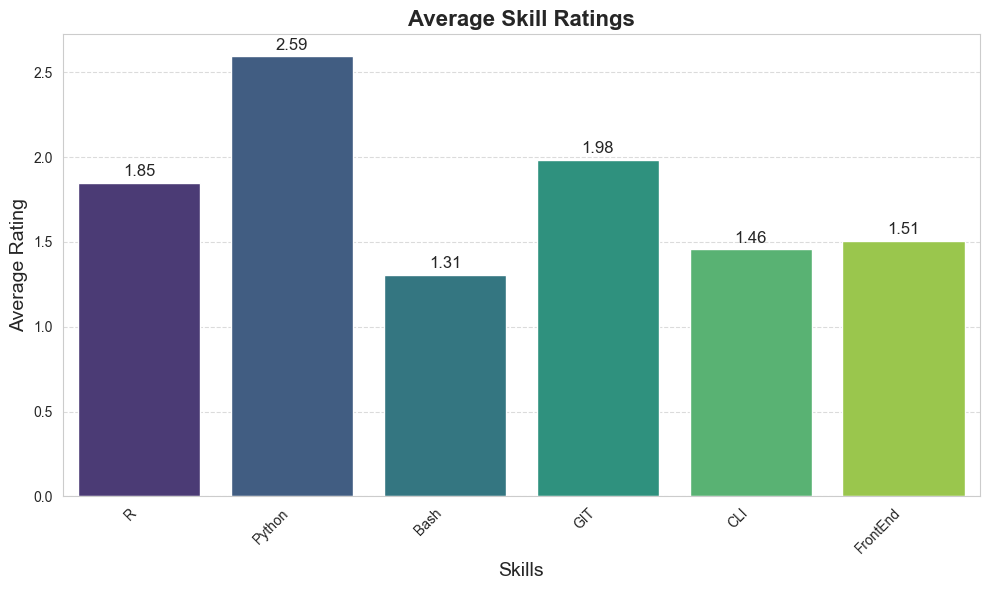

In [73]:
# Compute average ratings
avg_ratings = df[programming].mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot with a more appealing color palette
bars = sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='viridis', ax=ax)

# Add titles and labels
ax.set_title('Average Skill Ratings', fontsize=16, weight='bold')
ax.set_xlabel('Skills', fontsize=14)
ax.set_ylabel('Average Rating', fontsize=14)

# Rotate x-axis labels if they are long
plt.xticks(rotation=45, ha='right')

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for bar in bars.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='center', 
                size=12, xytext=(0, 8), 
                textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

### Średnio ludzie czują się najpewniej w python